In [4]:
file = 'subset_chu/citation_net_nat. mater._011122_voting_schema_bardo_infomap_01112022.xnet'

In [140]:
import xnetwork as xnet

In [6]:
net = xnet.xnet2igraph(file)

In [7]:
net.vs.attributes()

['name',
 'Cluster Index',
 'Cluster Name',
 'cluster_name',
 'cluster_top10',
 'id_label',
 'journal',
 'refs',
 'title',
 'wos_id',
 'year']

In [9]:
set(net.vs['cluster_top10'])

{'A - spin, magnetic, ferroelectric, domain, oxide, superconductivity, effect, film, spintronics, wall',
 'B - stem cell, hydrogel, fate, matrix, tissue, biomaterials, regulate, differentiation, adhesion, migration',
 'C - monolayer, boron nitride, van der waals, epitaxial graphene, two-dimensional material, carbon nanotube, 2d, mos2, moire, heterostructures',
 'D - bone, composite, deformation, silk, nanocomposites, carbon, nanotube, nucleation, spider, crystal',
 'E - polymer, organic semiconductor, solar cell, efficiency, molecular, solution-processed, field-effect transistor, blend, organic electronics, film',
 'F - colloidal, assembly, nanoparticle, self-assembly, nanocrystals, synthesis, nanoparticles, crystal, shape, dna',
 'G - vaccine, cancer, delivery, polymer, tumour, nanoparticles, targeted, target, material, immune',
 'H - electrode, lithium, electrolyte, electrochemical, redox, lithium-ion battery, charge, cathode, energy storage, hydrogen',
 'I - skin, electronics, flexi

In [3]:
import json

infos_from_journals_comm = json.loads(open('commsize_data_to_plot.json').read())
infos_from_journals_comm.keys()

infos_from_journals_impact = json.loads(open('impact_factor_data_to_plot.json').read())
infos_from_journals_impact.keys()


dict_keys(['ACS AMI', 'ACS Nano', 'Adv. Funct. Mat.', 'Adv. Mat.', 'Chem. Mat.', 'J. Am. Chem. Soc.', 'J. Mat. Chem. B', 'J. Mat. Chem. A', 'J. Mat. Chem. C', 'J. Mat. Chem.', 'Langmuir', 'Macromolecules', 'Nano Lett.', 'Nat. Mat.', 'Nat. Nanotechnol.'])

In [47]:
import matplotlib
import matplotlib.pyplot as plt

from matplotlib.ticker import MaxNLocator

def plot_impact_factor(infos_impact_factor, infos_comm_size):

    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    matplotlib.rc('xtick', labelsize=14) 
    matplotlib.rc('ytick', labelsize=14) 
    for journal, infos_to_plot in infos_impact_factor.items():
        if journal != 'J. Am. Chem. Soc.':
            continue
        fig, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=True)
        axs[0].set_ylim(0,100)
        matplotlib.pyplot.subplots_adjust(hspace=0)
        axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
        axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

        for label, label_info in infos_to_plot.items():
            axs[1].plot(label_info['x'], label_info['y'], label=label, color=label_info['c'])
        axs[0].set_xlim(2000, 2020)
        axs[0].set_title(journal + " (ratio = %.2f)" % label_info['ratio'])
        axs[1].legend(prop={'size': 8}, bbox_to_anchor=(1.05,1.55))
        axs[1].set_ylabel('impact factor', fontsize=16)
        
        j_comm_info = infos_comm_size[journal]
        print(min(j_comm_info['x']))
        
        axs[0].stackplot(j_comm_info['x'], *j_comm_info['hist'], labels=j_comm_info['labels'], colors=j_comm_info['c'])
#         axs[0].legend(prop={'size': 8}, bbox_to_anchor=(1.05,1.05))
        axs[0].set_ylabel('%', fontsize=16)
        axs[1].set_xlabel('year', fontsize=16)
#         plt.tight_layout()
        plt.savefig('outputs/impact_factor_comm_size_%s.pdf' % journal, bbox_inches='tight')
        

1900.0


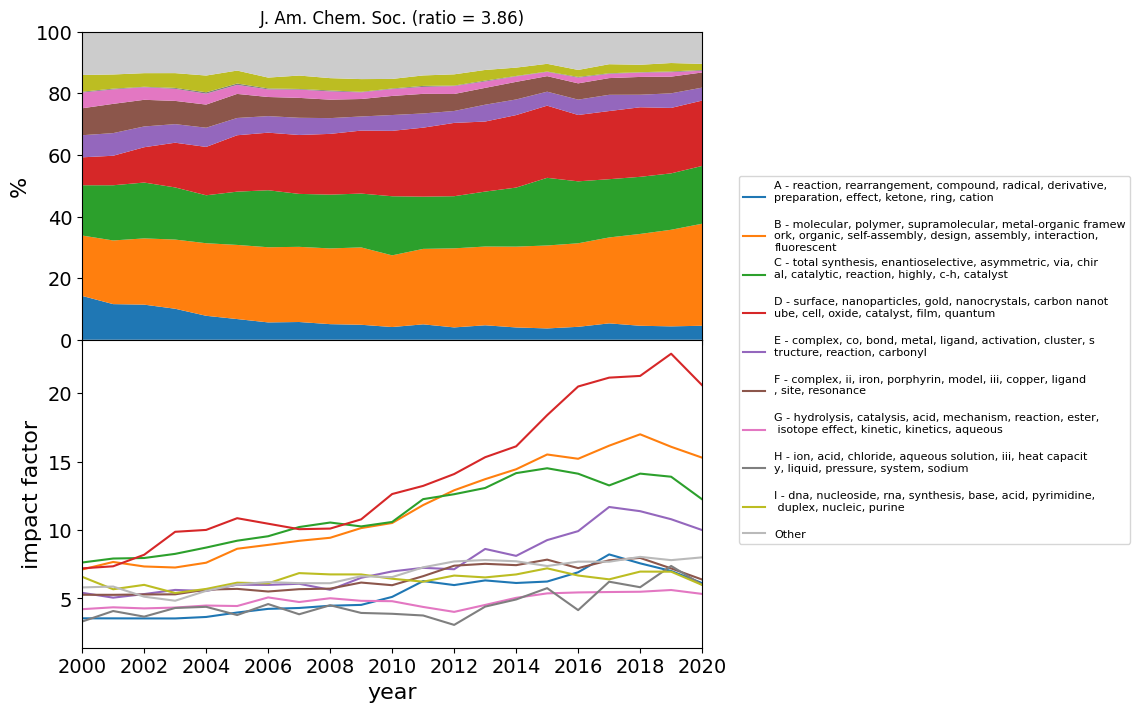

In [48]:
plot_impact_factor(infos_from_journals_impact, infos_from_journals_comm)

In [33]:
import matplotlib
import matplotlib.pyplot as plt

from matplotlib.ticker import MaxNLocator

def plot_impact_factor(infos_impact_factor, infos_comm_size):

    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    matplotlib.rc('xtick', labelsize=14) 
    matplotlib.rc('ytick', labelsize=14) 
    for journal, infos_to_plot in infos_impact_factor.items():
        if journal != 'J. Am. Chem. Soc.':
            continue
        fig, axs = plt.subplots(1, 1, figsize=(8, 5), sharex=True)
        axs.set_ylim(0,100)
        matplotlib.pyplot.subplots_adjust(hspace=0)
        axs.xaxis.set_major_locator(MaxNLocator(integer=True))
        
        for label, label_info in infos_to_plot.items():
            continue
#             axs.plot(label_info['x'], label_info['y'], label=label, color=label_info['c'])
#         axs[0].set_xlim(2000, 2020)
        axs.set_title(journal + " (ratio = %.2f)" % label_info['ratio'])
        axs.legend(prop={'size': 8}, bbox_to_anchor=(1.05,1.05))
#         axs[1].set_ylabel('impact factor', fontsize=16)
        
        j_comm_info = infos_comm_size[journal]
        axs.stackplot(j_comm_info['x'], *j_comm_info['hist'], labels=j_comm_info['labels'], colors=j_comm_info['c'])
#         axs.legend(prop={'size': 8}, bbox_to_anchor=(1.05,1.05))
        axs.set_ylabel('%', fontsize=16)
        axs.set_xlabel('year', fontsize=16)
#         plt.tight_layout()
        plt.savefig('outputs/impact_factor_comm_size_%s_ax0.pdf' % journal)
        

No handles with labels found to put in legend.


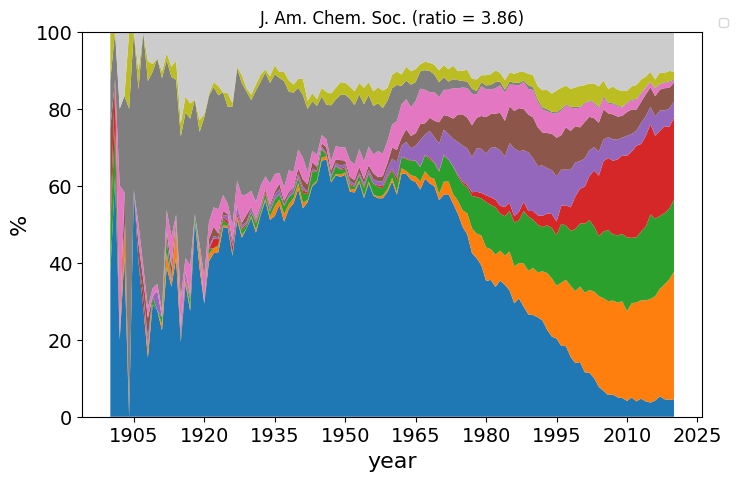

In [34]:
plot_impact_factor(infos_from_journals_impact, infos_from_journals_comm)